<a href="https://colab.research.google.com/github/bots384/ST_NLP_CRISIS_TWEETS/blob/main/Crisis_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Libraries

In [ ]:
!pip install -U sentence-transformers
!pip install  dgl -f https://data.dgl.ai/wheels/cu118/repo.html
!pip install transformers
!pip install demoji
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 26.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=d65825039d8e23586fbc80b01be9936df376d0b723e75819d6c73bcf0ac51a2c
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
Looking in links: https://data.dgl.ai/wheels/cu118/repo.html
     ━━

##Import Libs

In [ ]:
import os
os.environ['DGLBACKEND'] = 'pytorch'
import pandas as pd
from google.colab import drive
import torch
import torch.nn as nn
import torch.nn.functional as F
import dgl
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from transformers import AutoTokenizer
from dgl.nn.pytorch import GATConv
%matplotlib inline
from sentence_transformers import SentenceTransformer
from dgl.data import DGLDataset
from sklearn.model_selection import train_test_split
from dgl.nn import AvgPooling, MaxPooling
from sklearn import preprocessing
import time
from dgl.dataloading import GraphDataLoader
import dgl.nn.pytorch as dglnn
from torch.utils.data import DataLoader
from transformers import RobertaModel, RobertaTokenizer
import demoji
from sklearn.metrics import f1_score
from datasets import load_dataset

In [ ]:
device = (
    torch.device("cuda")
    if torch.cuda.is_available()
    else torch.device("cpu")
)

In [ ]:
device

device(type='cpu')

#Tweetter API calls

In [ ]:
#!pip install tweepy

In [ ]:
#!pip install tweepy --upgrade

In [ ]:
#import tweepy

In [ ]:
'''consumer_key = "TklWNERIX0hSNGhwTmpzRmlQd3k6MTpjaQ"
consumer_secret = "i8V18tPcaVqaL-TuMnImKzziPt_PoQICBm3lKqmaFtVsFtRirr"
access_token = "1555163267571617805-HLMwE8AmoP6FS4dvFmddXpY3aV2TD6"
access_token_secret = "Kh2kyWMAxEgj6zWImO6b53TWQf3jmbbuOr4k099T0c7V5"
bearer_token="AAAAAAAAAAAAAAAAAAAAANpanwEAAAAAFK5gJJI3%2B%2BUYuLLzrTeEC5k8wyg%3D7AtKolm8lhj7X8H1wKekFClXDjRhEuheUjRnvw2szlYBOtW4Xa"'''


'consumer_key = "TklWNERIX0hSNGhwTmpzRmlQd3k6MTpjaQ"\nconsumer_secret = "i8V18tPcaVqaL-TuMnImKzziPt_PoQICBm3lKqmaFtVsFtRirr"\naccess_token = "1555163267571617805-HLMwE8AmoP6FS4dvFmddXpY3aV2TD6"\naccess_token_secret = "Kh2kyWMAxEgj6zWImO6b53TWQf3jmbbuOr4k099T0c7V5"\nbearer_token="AAAAAAAAAAAAAAAAAAAAANpanwEAAAAAFK5gJJI3%2B%2BUYuLLzrTeEC5k8wyg%3D7AtKolm8lhj7X8H1wKekFClXDjRhEuheUjRnvw2szlYBOtW4Xa"'

In [ ]:
#authenticator = tweepy.OAuthHandler(consumer_key=consumer_key, consumer_secret=consumer_secret, )

In [ ]:
#authenticator.set_access_token(access_token, access_token_secret)

In [ ]:
#api = tweepy.API(authenticator, wait_on_rate_limit=True)

In [ ]:
'''crypto_coin = "bitcoin"
search_term = f'{crypto_coin} -filter:retweets'

tweet_cursor = tweepy.Cursor(api.search_tweets, q= search_term, lang="en",
tweet_mode="extended").items(100)
'''

'crypto_coin = "bitcoin"\nsearch_term = f\'{crypto_coin} -filter:retweets\'\n\ntweet_cursor = tweepy.Cursor(api.search_tweets, q= search_term, lang="en",\ntweet_mode="extended").items(100)\n'

In [ ]:
#tweets = [tweet.full_text for tweet in tweet_cursor]
#print(tweets)

In [ ]:
'''auth = tweepy.OAuth1UserHandler(
  consumer_key,
  consumer_secret,
  access_token,
  access_token_secret,
  bearer_token
)

api = tweepy.Client(
  bearer_token)'''

'auth = tweepy.OAuth1UserHandler(\n  consumer_key,\n  consumer_secret,\n  access_token,\n  access_token_secret,\n  bearer_token\n)\n\napi = tweepy.Client(\n  bearer_token)'

In [ ]:
'''tweets = api.search_recent_tweets(query="hello", max_results=10)

for tweet in tweets:
    try:
        print(tweet.retweeted_status.full_text)
        print("=====")
    except AttributeError:
        print(tweet.full_text)
        print("=====")'''

'tweets = api.search_recent_tweets(query="hello", max_results=10)\n\nfor tweet in tweets:\n    try:\n        print(tweet.retweeted_status.full_text)\n        print("=====")\n    except AttributeError:\n        print(tweet.full_text)\n        print("=====")'

#Utils

In [ ]:
def evaluate_model(model, loss, data_iter):
    model.eval()
    l_sum, n = 0.0, 0
    with torch.no_grad():
        for g in data_iter:
            g= g.to(device)
            y_pred = model(g, g.ndata["feat"])
            y_pred = y_pred.reshape(g.num_nodes(), classes_n)
            l = loss(y_pred, g.ndata["labels"])
            l_sum += l.item() * g.ndata["labels"].shape[0]
            n += g.ndata["labels"].shape[0]
        return l_sum / n

In [ ]:
def evaluate_nlp_model(model, loss, data_iter):
    model.eval()
    l_sum, n = 0.0, 0
    with torch.no_grad():
        for data in data_iter:
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.long)
            y_pred = model(ids, mask, token_type_ids)
            l = loss(y_pred, targets)
            l_sum += l.item()
            n += targets.size(0)
        return l_sum / n


In [ ]:
def test_model(model, loss, data_iter):
    model.eval()
    l_sum, n = 0.0, 0
    with torch.no_grad():
        for g in data_iter:
            g= g.to(device)
            y_pred = model(g, g.ndata["feat"])
            y_pred = y_pred.reshape(g.num_nodes(), classes_n)
            l = loss(y_pred, g.ndata["labels"])
            l_sum += l.item() * g.ndata["labels"].shape[0]
            n += g.ndata["labels"].shape[0]
        return l_sum / n

In [ ]:
def train_model(dgl_model, epochs, train_dataloader, test_dataloader, optimizer, loss, model_path='model.pt', print_results=True):
    tls = []
    vls = []
    epoch_list = []
    min_val_loss = np.inf
    for epoch in range(1, epochs + 1):
        t0=time.time()
        l_sum, n = 0.0, 0
        dgl_model.train()
        for batched_graphs in train_dataloader:
            batched_graphs = batched_graphs.to(device)

            y_pred = dgl_model(batched_graphs, batched_graphs.ndata["feat"].to(device))

            y_pred = y_pred.squeeze()
            l = loss(y_pred, batched_graphs.ndata["labels"])

            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            l_sum += l.item() * batched_graphs.ndata["feat"].shape[0]
            n += batched_graphs.ndata["feat"].shape[0]
        val_loss = evaluate_model(dgl_model, loss, test_dataloader)
        if val_loss < min_val_loss:
            min_val_loss = val_loss
            torch.save(dgl_model.state_dict(), model_path)
        if   print_results:
            print(
                "epoch",
                epoch,
                ", train loss:",
                l_sum / n,
                ", validation loss:",
                val_loss,
                ", time:",
                time.time()-t0
            )
        tls.append(l_sum / n)
        vls.append(val_loss)
        epoch_list.append(epoch)
    return tls, vls, epoch_list

In [ ]:
import re
def preprocess_tweet(tweet):
    # Remove URLs
    tweet = text = demoji.replace(tweet)
    tweet = re.sub(r"http\S+", "URL", tweet)
    # Remove mentions
    tweet = re.sub(r"@\S+", "USER", tweet)

    # Remove hashtags
    #tweet = re.sub(r"#\S+", "", tweet)
    # Remove non-alphanumeric characters and convert to lowercase
    #tweet = re.sub(r"[^a-zA-Z0-9]", " ", tweet).lower()
    tweet = tweet.lower()
    return tweet


def preprocess(text):
    new_text = []


    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

#Read Crisis NLP Datasets

-[Crisis NLP](https://crisisnlp.qcri.org/)

 [Extracting Information Nuggets from DisasterRelated Messages in Social Media Dataset](https://mimran.me/papers/imran_shady_carlos_fernando_patrick_iscram2013.pdf)

In [ ]:
#mounting google drive
#drive.mount('/content/drive')

In [ ]:
#crisis_tweets=pd.read_pickle('/content/drive/MyDrive/datasets/crisis_nlp/crisis_tweets.pkl')
google_drive_id = '1-2jCzvJzrK98MD-g7JyNNmQ2e9TvTs1v'
crisis_tweets = pd.read_pickle('https://drive.google.com/u/0/uc?id='+google_drive_id+'&export=download&confirm=t')

In [ ]:
crisis_tweets

,id,text,created_at,label
0,295654395306201088,Congrats to all my Liverpool supporting fans f...,2013-01-27 22:07:55+00:00,Unmatched_Unknown
1,338272854569275392,"Ready for a relaxing weekend, but have too muc...",2013-05-25 12:38:27+00:00,Unmatched_Unknown
2,908862255512657920,Public-private information portal developed to...,2017-09-16 01:17:02+00:00,donation_and_volunteering
3,929989549895438336,WSJ: Earthquake near Iran-Iraq border kills mo...,2017-11-13 08:29:21+00:00,affected_individuals
4,400090279706779648,Please consider donating to the Canadian Red C...,2013-11-12 02:38:50+00:00,donation_and_volunteering
...,...,...,...,...
617,575799583629946880,RT @GravityDynamic: MT @350 Our thoughts are w...,2015-03-11 23:24:53+00:00,other_relevant_information
618,575800027341328384,Workers Evacuated From Offshore Rigs As Cyclon...,2015-03-11 23:26:39+00:00,other_relevant_information
619,575800046198747136,RT @GravityDynamic: MT @350 Our thoughts are w...,2015-03-11 23:26:43+00:00,other_relevant_information
621,575800076250972160,cyclone chaser @sophie_walsh9 steak gorgonzola...,2015-03-11 23:26:50+00:00,other_relevant_information


In [ ]:
crisis_tweets['created_at']= pd.to_datetime(crisis_tweets['created_at'], errors='ignore')

In [ ]:
crisis_tweets.created_at.dtypes

datetime64[ns, UTC]

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(crisis_tweets.label)

LabelEncoder()

In [ ]:
le.classes_

array(['Unmatched_Unknown', 'affected_individuals', 'caution_and_advice',
       'donation_and_volunteering', 'infrastructure_and_utilities_damage',
       'not_related_or_irrelevant', 'other_relevant_information',
       'sympathy_and_support'], dtype=object)

In [ ]:
crisis_tweets['label_en'] = le.transform(crisis_tweets.label)

In [ ]:
crisis_tweets

,id,text,created_at,label,label_en
0,295654395306201088,Congrats to all my Liverpool supporting fans f...,2013-01-27 22:07:55+00:00,Unmatched_Unknown,0
1,338272854569275392,"Ready for a relaxing weekend, but have too muc...",2013-05-25 12:38:27+00:00,Unmatched_Unknown,0
2,908862255512657920,Public-private information portal developed to...,2017-09-16 01:17:02+00:00,donation_and_volunteering,3
3,929989549895438336,WSJ: Earthquake near Iran-Iraq border kills mo...,2017-11-13 08:29:21+00:00,affected_individuals,1
4,400090279706779648,Please consider donating to the Canadian Red C...,2013-11-12 02:38:50+00:00,donation_and_volunteering,3
...,...,...,...,...,...
617,575799583629946880,RT @GravityDynamic: MT @350 Our thoughts are w...,2015-03-11 23:24:53+00:00,other_relevant_information,6
618,575800027341328384,Workers Evacuated From Offshore Rigs As Cyclon...,2015-03-11 23:26:39+00:00,other_relevant_information,6
619,575800046198747136,RT @GravityDynamic: MT @350 Our thoughts are w...,2015-03-11 23:26:43+00:00,other_relevant_information,6
621,575800076250972160,cyclone chaser @sophie_walsh9 steak gorgonzola...,2015-03-11 23:26:50+00:00,other_relevant_information,6


In [ ]:
crisis_tweets['p_text']=crisis_tweets['text'].apply(preprocess )

In [ ]:
crisis_tweets

,id,text,created_at,label,label_en,p_text
0,295654395306201088,Congrats to all my Liverpool supporting fans f...,2013-01-27 22:07:55+00:00,Unmatched_Unknown,0,Congrats to all my Liverpool supporting fans f...
1,338272854569275392,"Ready for a relaxing weekend, but have too muc...",2013-05-25 12:38:27+00:00,Unmatched_Unknown,0,"Ready for a relaxing weekend, but have too muc..."
2,908862255512657920,Public-private information portal developed to...,2017-09-16 01:17:02+00:00,donation_and_volunteering,3,Public-private information portal developed to...
3,929989549895438336,WSJ: Earthquake near Iran-Iraq border kills mo...,2017-11-13 08:29:21+00:00,affected_individuals,1,WSJ: Earthquake near Iran-Iraq border kills mo...
4,400090279706779648,Please consider donating to the Canadian Red C...,2013-11-12 02:38:50+00:00,donation_and_volunteering,3,Please consider donating to the Canadian Red C...
...,...,...,...,...,...,...
617,575799583629946880,RT @GravityDynamic: MT @350 Our thoughts are w...,2015-03-11 23:24:53+00:00,other_relevant_information,6,RT @user MT @user Our thoughts are w people in...
618,575800027341328384,Workers Evacuated From Offshore Rigs As Cyclon...,2015-03-11 23:26:39+00:00,other_relevant_information,6,Workers Evacuated From Offshore Rigs As Cyclon...
619,575800046198747136,RT @GravityDynamic: MT @350 Our thoughts are w...,2015-03-11 23:26:43+00:00,other_relevant_information,6,RT @user MT @user Our thoughts are w people in...
621,575800076250972160,cyclone chaser @sophie_walsh9 steak gorgonzola...,2015-03-11 23:26:50+00:00,other_relevant_information,6,cyclone chaser @user steak gorgonzola last nig...


In [ ]:
crisis_tweets['text'] =crisis_tweets['p_text']

In [ ]:
crisis_tweets['label_en'].value_counts()

0    37317
6     9201
1     4952
3     4517
4     3031
7     2919
5     2137
2     1698
Name: label_en, dtype: int64

In [ ]:
crisis_tweets = crisis_tweets[crisis_tweets['label_en']!=0]

In [ ]:
crisis_tweets['label_en'].unique()

array([3, 1, 4, 7, 2, 5, 6])

In [ ]:
crisis_tweets['label_en'] = crisis_tweets['label_en']-1

<ipython-input-24-5bcd28d661db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crisis_tweets['label_en'] = crisis_tweets['label_en']-1


In [ ]:
train['created_at']

created_at
2014-04-02 02:41:25+00:00   2014-04-02 02:41:25+00:00
2014-04-02 02:41:26+00:00   2014-04-02 02:41:26+00:00
2014-04-02 02:41:26+00:00   2014-04-02 02:41:26+00:00
2014-04-02 02:41:27+00:00   2014-04-02 02:41:27+00:00
2014-04-02 02:41:32+00:00   2014-04-02 02:41:32+00:00
                                       ...           
2015-12-30 10:31:12+00:00   2015-12-30 10:31:12+00:00
2015-12-30 10:31:58+00:00   2015-12-30 10:31:58+00:00
2015-12-30 10:33:50+00:00   2015-12-30 10:33:50+00:00
2015-12-30 10:34:30+00:00   2015-12-30 10:34:30+00:00
2015-12-30 10:44:22+00:00   2015-12-30 10:44:22+00:00
Name: created_at, Length: 14097, dtype: datetime64[ns, UTC]

In [ ]:
crisis_tweets=crisis_tweets.set_index(pd.to_datetime(crisis_tweets['created_at'])).sort_index()
train = crisis_tweets['2014-01-01':'2015-12-31']
val = crisis_tweets['2012-01-01':'2013-12-31']
test = crisis_tweets['2017-01-01':'2017-12-31']
print("train shape: ", train.shape)
print("val shape: ", val.shape)
print("test shape: ", test.shape)

train shape:  (14097, 6)
val shape:  (8358, 6)
test shape:  (5517, 6)


In [ ]:
#train, val = train_test_split(crisis_tweets, test_size=0.2, random_state=42, shuffle=True)
#train, test = train_test_split(train, test_size=0.1, random_state=42, shuffle=True)

#EDA

<Axes: title={'center': 'Crisis Label Distribution before split'}, ylabel='id'>

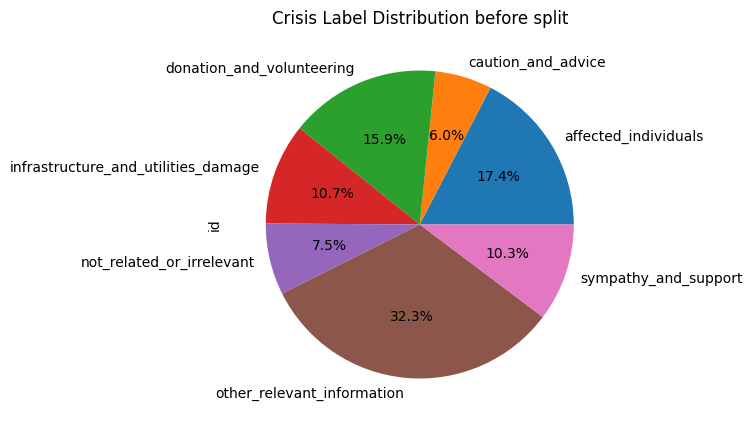

In [ ]:
crisis_tweets[['id', 'label']].groupby('label').count().plot.pie(y='id', figsize=(5, 5), autopct='%1.1f%%', legend=False, title= 'Crisis Label Distribution before split')

<Axes: title={'center': 'Crisis Label Distribution train '}, ylabel='id'>

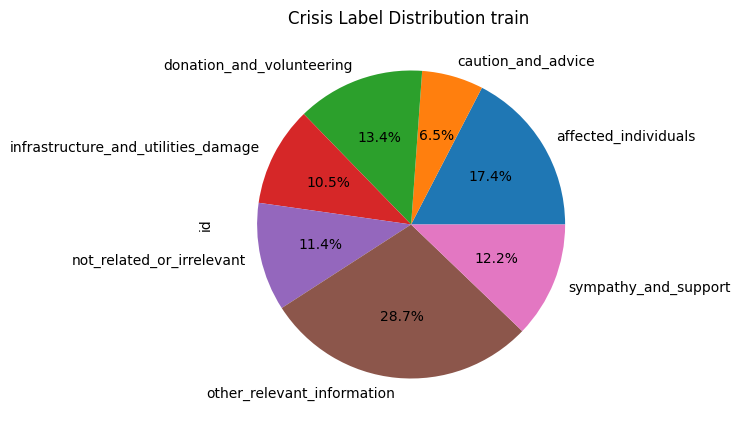

In [ ]:
train[['id', 'label']].groupby('label').count().plot.pie(y='id', figsize=(5, 5), autopct='%1.1f%%', legend=False, title= 'Crisis Label Distribution train ')

<Axes: title={'center': 'Crisis Label Distribution Validation '}, ylabel='id'>

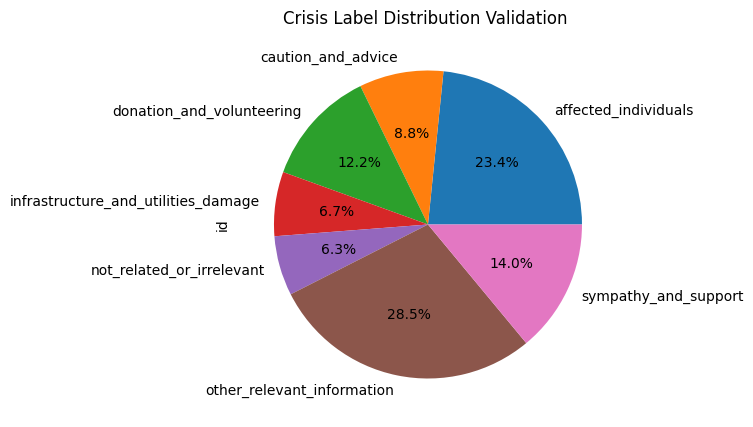

In [ ]:
val[['id', 'label']].groupby('label').count().plot.pie(y='id', figsize=(5, 5), autopct='%1.1f%%', legend=False, title= 'Crisis Label Distribution Validation ')

<Axes: title={'center': 'Crisis Label Distribution Test '}, ylabel='id'>

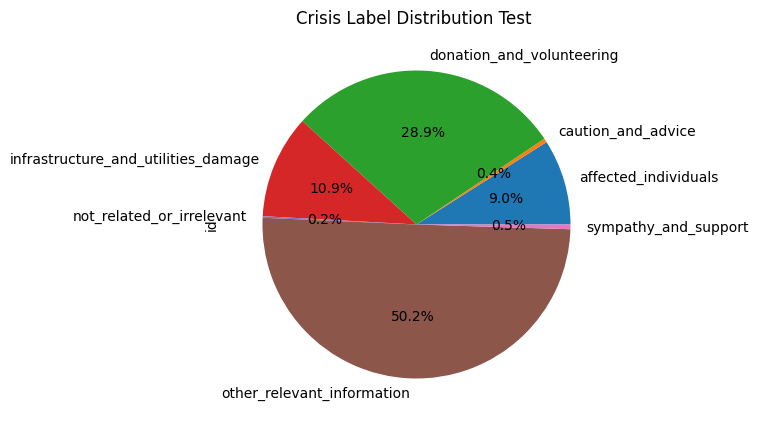

In [ ]:
test[['id', 'label']].groupby('label').count().plot.pie(y='id', figsize=(5, 5), autopct='%1.1f%%', legend=False, title= 'Crisis Label Distribution Test ')

In [ ]:
crisis_tweets=crisis_tweets.set_index(pd.to_datetime(crisis_tweets['created_at'])).sort_index()
grouper = pd.Grouper( freq='3M')
result = crisis_tweets[['label']].groupby([grouper, 'label']).size().reset_index()
result.columns=['created_month', 'label', 'counts']
result = result.pivot(index='created_month', columns='label', values='counts')
result = result.fillna(0)
result

label,affected_individuals,caution_and_advice,donation_and_volunteering,infrastructure_and_utilities_damage,not_related_or_irrelevant,other_relevant_information,sympathy_and_support
created_month,,,,,,,
2006-03-31 00:00:00+00:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2006-06-30 00:00:00+00:00,0.0,0.0,0.0,18.0,0.0,0.0,0.0
2006-09-30 00:00:00+00:00,1.0,0.0,1.0,334.0,0.0,0.0,0.0
2007-09-30 00:00:00+00:00,4.0,18.0,8.0,0.0,0.0,0.0,0.0
2012-06-30 00:00:00+00:00,75.0,16.0,26.0,30.0,0.0,156.0,58.0
2012-09-30 00:00:00+00:00,78.0,72.0,100.0,29.0,0.0,122.0,41.0
2012-12-31 00:00:00+00:00,99.0,83.0,54.0,15.0,38.0,93.0,62.0
2013-03-31 00:00:00+00:00,182.0,104.0,30.0,74.0,100.0,278.0,121.0
2013-06-30 00:00:00+00:00,328.0,102.0,97.0,100.0,247.0,412.0,244.0


<Axes: xlabel='created_month'>

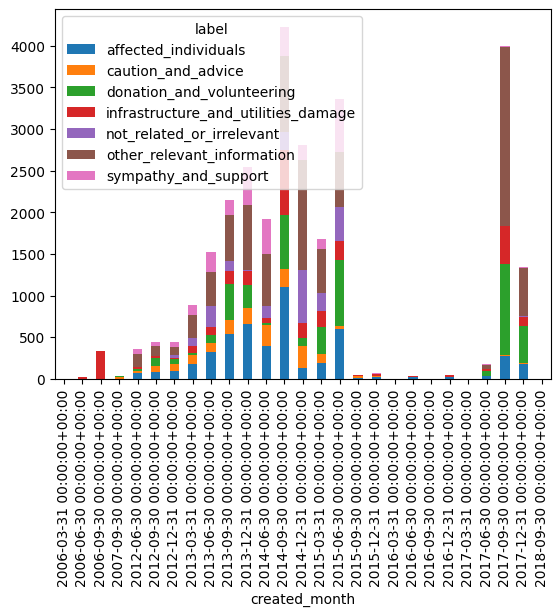

In [ ]:
result.plot.bar(stacked=True)

In [ ]:
crisis_tweets['2009-01-01':'2010-01-01']

,id,text,created_at,label,label_en,p_text
created_at,,,,,,


#BenchMarks

##Benchmark tweet_eval dataset

In [ ]:
bench_dataset = load_dataset("mteb/tweet_sentiment_extraction")

  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
bench_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'label', 'label_text'],
        num_rows: 27481
    })
    test: Dataset({
        features: ['id', 'text', 'label', 'label_text'],
        num_rows: 3534
    })
})

In [ ]:
nlp_train_df = pd.DataFrame(bench_dataset['train'])
nlp_val_df = pd.DataFrame(bench_dataset['test'])
nlp_train_df, nlp_test_df = train_test_split(nlp_train_df, test_size=0.1, random_state=42, shuffle=True)

In [ ]:
nlp_train_df['text']=nlp_train_df['text'].apply(preprocess)
nlp_val_df['text']=nlp_val_df['text'].apply(preprocess)
nlp_test_df['text']=nlp_test_df['text'].apply(preprocess)

##Base NLP Classification Model

In [ ]:
nlp_train_df = train[['text', 'label_en']]
nlp_val_df = val[['text', 'label_en']]
nlp_test_df = test[['text', 'label_en']]

nlp_train_df.columns = ['text', 'label']
nlp_val_df.columns = ['text', 'label']
nlp_test_df.columns = ['text', 'label']

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

##Dataset

In [ ]:
class NLPDataset(Dataset):
    def __init__(self, data, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.tweets = data.text
        self.targets = data.label
        self.max_len = max_len

    def __len__(self):
        return len(self.tweets)


    def __getitem__(self, index):
        text = str(self.tweets.iloc[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]

        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets.iloc[index], dtype=torch.float)
        }

##Model

In [ ]:
class RobertaClass(torch.nn.Module):
    def __init__(self, n_classes):
        super(RobertaClass, self).__init__()
        self.l1 = RobertaModel.from_pretrained("roberta-base")
        self.pre_classifier = torch.nn.Linear(768, n_classes)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(768, n_classes)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output


##Train

In [ ]:
n_classes = 3

In [ ]:
roberta_model = RobertaClass(n_classes)
roberta_model.to(device)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaClass(
  (l1): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((

In [ ]:
max_length = 128
LEARNING_RATE = 1e-05
batch_size = 64


In [ ]:
train_dtst = NLPDataset(nlp_train_df, tokenizer, max_length)
test_dtst = NLPDataset(nlp_test_df, tokenizer, max_length)
val_dtst = NLPDataset(nlp_val_df, tokenizer, max_length)

In [ ]:
train_dataloader = DataLoader(train_dtst, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dtst, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dtst, batch_size=1, shuffle=True)

In [ ]:
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params =  roberta_model.parameters(), lr=LEARNING_RATE)

In [ ]:
def train_nlp_model(nlp_model, epochs, train_dataloader, test_dataloader, optimizer, loss, print_results=True):
    tls = []
    vls = []
    epoch_list = []
    min_val_loss = np.inf
    for epoch in range(1, epochs + 1):
        t0=time.time()
        l_sum, n = 0.0, 0
        nlp_model.train()
        for data in train_dataloader:
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.long)
            y_pred = nlp_model(ids, mask, token_type_ids)
            y_pred = y_pred.squeeze()
            l = loss(y_pred, targets)

            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            l_sum += l.item()
            n += targets.size(0)
        val_loss = evaluate_nlp_model(nlp_model, loss, test_dataloader)
        if val_loss < min_val_loss:
            min_val_loss = val_loss
            torch.save(nlp_model.state_dict(), "model.pt")
        if   print_results:
            print(
                "epoch",
                epoch,
                ", train loss:",
                l_sum / n,
                ", validation loss:",
                val_loss,
                ", time:",
                time.time()-t0
            )
        tls.append(l_sum / n)
        vls.append(val_loss)
        epoch_list.append(epoch)
    return tls, vls, epoch_list

In [ ]:
tls, vls, _  = train_nlp_model(roberta_model, 5, train_dataloader, val_dataloader, optimizer, loss_function)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


epoch 1 , train loss: 0.010298672094085581 , validation loss: 0.008304976006989838 , time: 172.5889332294464
epoch 2 , train loss: 0.007562758009709067 , validation loss: 0.007769581320498984 , time: 170.5174310207367
epoch 3 , train loss: 0.006814226681059587 , validation loss: 0.007846113815102525 , time: 164.1273910999298
epoch 4 , train loss: 0.006036223298727685 , validation loss: 0.007857966706384422 , time: 164.02668285369873
epoch 5 , train loss: 0.0053473391336529424 , validation loss: 0.009163122444957006 , time: 163.63442850112915


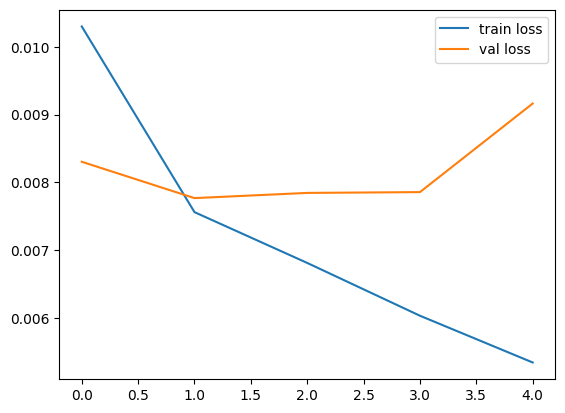

In [ ]:
plt.plot(tls, label='train loss')
plt.plot(vls, label='val loss')
plt.legend()


In [ ]:
roberta_model = RobertaClass(n_classes)
roberta_model.load_state_dict(torch.load('/content/model.pt'))
roberta_model.to(device)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaClass(
  (l1): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((

In [ ]:
def test_nlp_model(model, data_iter, model_type):
    model.eval()
    y_preds = []
    y_trues = []
    with torch.no_grad():
        for data in data_iter:
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.long)
            y_pred = model(ids, mask, token_type_ids)
            y_trues.append( targets.item())
            y_pred = torch.argmax(y_pred).tolist()
            y_preds.append(y_pred)
        f1 = f1_score(y_trues, y_preds, average='macro' )
    print(model_type, " f1_score : " , f1)
    return f1

In [ ]:
test_nlp_model(roberta_model, test_dataloader, "FineTuned Roberta")

FineTuned Roberta  f1_score :  0.8002915074421354


0.8002915074421354

#DGL

##DGL Dataset

In [ ]:
class CrisisTweetDataset(DGLDataset):
    def __init__(self, input_df, freq, embedings_model, neigh_n, device):
        self.device=device
        self.input_df = input_df
        self.freq=freq
        self.embedings_model = embedings_model
        self.neigh_n = neigh_n
        self.graph_list = []
        super().__init__(name='CrisisTweetDataset')

    def process(self):
        grouper = pd.Grouper(key="created_at", freq=self.freq)
        grouped_df = self.input_df.groupby(grouper)
        for index, group in grouped_df:
            if not group.empty:
                labels= []
                x = torch.stack(group['text'].apply(lambda x: torch.from_numpy(self.embedings_model.encode(x))).values.tolist())
                l =torch.Tensor(group['label_en'].values).long()
                knn_g = dgl.knn_graph(x, self.neigh_n, dist='cosine')
                knn_g.to(device)
                knn_g.ndata["feat"]=x
                knn_g.ndata["labels"]=l
                self.graph_list.append(knn_g)

    def __len__(self):
        return len(self.graph_list)

    def __getitem__(self, index):
        return self.graph_list[index]


## Models

### Graph Attention Network
[dgl GATConv](https://docs.dgl.ai/en/latest/generated/dgl.nn.pytorch.conv.GATConv.html)


In [ ]:


class CrisisDGL(nn.Module):
    def __init__(self, in_feat, hidden_dim, heads_n, classes_n, device):
        super(CrisisDGL, self).__init__()
        self.gatc1 = dglnn.GATConv(in_feat, hidden_dim, 1).to(device)
        self.dropout1 = torch.nn.Dropout(0.3).to(device)
        #self.gatc2 = dglnn.GATConv(hidden_dim*heads_n, hidden_dim, 1).to(device)
        #self.dropout2 = torch.nn.Dropout(0.2).to(device)
        self.linear1 = nn.Linear(hidden_dim, classes_n).to(device)

    def forward(self, g, h):
        bs = h.shape[0]
        h =self.gatc1(g, h)
        h = torch.relu(h)
        #h = self.dropout1(h)
        #h = h.reshape(bs, -1)
        #h =self.gatc2(g, h)
        #h = torch.relu(h)
        h = self.linear1(h)
        h = torch.relu(h)
        return h

    def reset_weights(self):
        for layer in self.children():
            if hasattr(layer, 'reset_parameters'):
                layer.reset_parameters()


### Graph convolutional model
[dgl GraphConv](https://docs.dgl.ai/en/latest/generated/dgl.nn.pytorch.conv.GraphConv.html)

In [ ]:
class CrisisDGLConv(nn.Module):
    def __init__(self, in_feat, hidden_dim, classes_n, device):
        super(CrisisDGLConv, self).__init__()
        self.gatc1 = dglnn.GraphConv(in_feat, hidden_dim).to(device)
        self.dropout1 = torch.nn.Dropout(0.4).to(device)
        self.gatc2 = dglnn.GraphConv(hidden_dim, hidden_dim).to(device)
        self.dropout2 = torch.nn.Dropout(0.3).to(device)
        self.linear1 = nn.Linear(hidden_dim, hidden_dim).to(device)
        self.dropout3 = torch.nn.Dropout(0.1).to(device)
        self.linear2 = nn.Linear(hidden_dim, classes_n).to(device)

    def forward(self, g, h):
        bs = h.shape[0]
        h =self.gatc1(g, h)
        h = self.dropout1(h)
        h = torch.relu(h)
        h = h.reshape(bs, -1)
        h =self.gatc2(g, h)
        h = self.dropout2(h)
        h = torch.relu(h)
        h = self.linear1(h)
        h = self.dropout3(h)
        h = torch.relu(h)
        h =  self.linear2(h)
        h = torch.relu(h)
        return h

    def reset_weights(self):
        for layer in self.children():
            if hasattr(layer, 'reset_parameters'):
                layer.reset_parameters()

### Linear
[Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)



In [ ]:
class SentenceClassification(nn.Module):
    def __init__(self, in_feat, hidden_dim, classes_n, device):
        super(SentenceClassification, self).__init__()
        self.linear1 = nn.Linear(in_feat, hidden_dim).to(device)
        self.dropout1 = torch.nn.Dropout(0.1).to(device)
        self.linear2 = nn.Linear(hidden_dim, classes_n).to(device)
    def forward(self, g, h):
        h = self.linear1(h)
        h = self.dropout1(h)
        h = torch.relu(h)
        h =  self.linear2(h)
        h = torch.relu(h)
        return h

##Training

In [ ]:
freq_group= '30D'
batch_size=8192
neigh_n = 3
epochs=60000
learning_rate =  5e-05
loss = nn.CrossEntropyLoss()
hidden_dim = 8
heads_n = 3
classes_n = len(crisis_tweets.label.unique())

In [ ]:
sentence_emb_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2').to(device)

In [ ]:
train_dtst = CrisisTweetDataset(train, freq_group, sentence_emb_model, neigh_n, device=device)
test_dtst = CrisisTweetDataset(test, freq_group, sentence_emb_model, neigh_n, device=device)
val_dtst = CrisisTweetDataset(val, freq_group, sentence_emb_model, neigh_n, device=device)

/usr/local/lib/python3.10/dist-packages/dgl/transforms/functional.py:308: DGLWarning: 'k' should be less than or equal to the number of points in 'x'expect k <= 2, got k = 3, use k = 2
  dgl_warning(
/usr/local/lib/python3.10/dist-packages/dgl/transforms/functional.py:308: DGLWarning: 'k' should be less than or equal to the number of points in 'x'expect k <= 1, got k = 3, use k = 1
  dgl_warning(


In [ ]:
train_dataloader = GraphDataLoader(train_dtst, batch_size=batch_size, shuffle=False)
val_dataloader = GraphDataLoader(val_dtst, batch_size=batch_size, shuffle=False)
test_dataloader = GraphDataLoader(test_dtst, batch_size=1, shuffle=False)

###Train GAT

In [ ]:
gat_model = CrisisDGL(test_dtst[0].ndata["feat"].shape[1], hidden_dim,heads_n, classes_n, device)
gat_optimizer = torch.optim.Adam(gat_model.parameters(), lr=learning_rate)

In [ ]:
tls, vls, _  = train_model(gat_model, epochs, train_dataloader, val_dataloader, gat_optimizer, loss, model_path='gat_model.pt')

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
epoch 9862 , train loss: 1.3886642456054688 , validation loss: 1.4672257900238037 , time: 0.02613353729248047
epoch 9863 , train loss: 1.388602614402771 , validation loss: 1.4671787023544312 , time: 0.025662899017333984
epoch 9864 , train loss: 1.3885412216186523 , validation loss: 1.46713125705719 , time: 0.028462648391723633
epoch 9865 , train loss: 1.3884797096252441 , validation loss: 1.4670840501785278 , time: 0.02869868278503418
epoch 9866 , train loss: 1.3884185552597046 , validation loss: 1.467036485671997 , time: 0.029145240783691406
epoch 9867 , train loss: 1.3883572816848755 , validation loss: 1.4669890403747559 , time: 0.025580406188964844
epoch 9868 , train loss: 1.3882962465286255 , validation loss: 1.466941475868225 , time: 0.02677297592163086
epoch 9869 , train loss: 1.3882354497909546 , validation loss: 1.4668941497802734 , time: 0.025786876678466797
epoch 9870 , train loss: 1.3881745338439941 , validation loss: 1.

KeyboardInterrupt: ignored

###Train GraphConv

In [ ]:
graphConv_model = CrisisDGLConv(test_dtst[0].ndata["feat"].shape[1], hidden_dim, classes_n, device)
graphConv_oprimizer = torch.optim.Adam(graphConv_model.parameters(), lr=learning_rate)

In [ ]:
tls2, vls2, _  = train_model(graphConv_model, epochs, train_dataloader, val_dataloader, graphConv_oprimizer, loss, model_path='graphConv_model')

###Train Linear

In [ ]:
linear_classifier = SentenceClassification(test_dtst[0].ndata["feat"].shape[1], hidden_dim, classes_n, device)
linear_optimizer = torch.optim.Adam(linear_classifier.parameters(), lr=learning_rate)

In [ ]:
tls3, vls3, _  =train_model(linear_classifier, epochs, train_dataloader, val_dataloader, linear_optimizer, loss)

##Compare Models

In [ ]:
figure, axis = plt.subplots(1,3, layout='constrained')
figure.set_size_inches(15, 5)
axis[0].plot(tls, label='train loss')
axis[0].plot(vls, label='val loss')
axis[0].legend()
axis[0].set_title("GAT")

axis[1].plot(tls2, label='train loss')
axis[1].plot(vls2, label='val loss')
axis[1].legend()
axis[1].set_title("GraphConv")

axis[2].plot(tls3, label='train loss')
axis[2].plot(vls3, label='val loss')
axis[2].legend()
axis[2].set_title("Linear")

plt.show()

In [ ]:
def test_model(model, data_iter, model_type):
    model.eval()
    y_preds = []
    y_trues = []
    with torch.no_grad():
        for g in data_iter:
            g= g.to(device)
            y_pred = model(g, g.ndata["feat"])
            y_pred = y_pred.reshape(g.num_nodes(), classes_n)
            y_trues = y_trues + (g.ndata["labels"].tolist())
            for r in y_pred:
               y_preds.append(torch.argmax(r).tolist())
    f1 = f1_score(y_trues, y_preds, average='macro' )
    print(model_type, " f1_score : " , f1)
    return f1

In [ ]:
gat_model = CrisisDGL(test_dtst[0].ndata["feat"].shape[1], hidden_dim,heads_n, classes_n, device)
gat_model.load_state_dict(torch.load('/content/gat_model.pt'))
gat_model.to(device)
test_model(gat_model , test_dataloader, "GAT")

GAT  f1_score :  0.31296120999417004


0.31296120999417004

In [ ]:
graphConv_model = CrisisDGLConv(test_dtst[0].ndata["feat"].shape[1], hidden_dim, classes_n, device)
graphConv_model.load_state_dict(torch.load('/content/model.pt'))
graphConv_model.to(device)
test_model(graphConv_model, test_dataloader, "GraphConv")

GraphConv  f1_score :  0.21974065101482307


0.21974065101482307

In [ ]:
test_model(linear_classifier, test_dataloader, "Linear")

Linear  f1_score :  0.0013914656771799629


0.0013914656771799629

##Tune

In [ ]:
!pip install wandb -qq

In [ ]:
import wandb
import pprint

In [ ]:
!wandb login --relogin
wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


wandb: Currently logged in as: g-botsarakos. Use `wandb login --relogin` to force relogin


True

In [ ]:
test_size=0.2
batch_size=2048
epochs=10
learning_rate = 0.001
loss = nn.CrossEntropyLoss()
classes_n = len(crisis_tweets.label.unique())
sentence_emb_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2').to(device)

In [ ]:
sweep_config = {
    'method': 'random'
    }
metric = {
    'name': 'loss',
    'goal': 'minimize'
    }
params = {
    'freq_group':{
        'values': ['5D', '10D', '1M', '2M', '3W']
        },
    'neigh_n':{
        'values': [ 4, 10, 15, 30, 50]
        },
    'hidden_dim':{
        'values': [ 4, 8, 16, 32, 64]
        },
    'heads_n':{
        'values': [ 1, 2, 4, 16, 32]
        }
}
sweep_config['parameters'] = params
sweep_config['metric'] = metric
sweep_id = wandb.sweep(sweep_config, project="CRISIS_NLP_DGL_PYTORCH_DATA_PARAMS", entity="g-botsarakos")

Create sweep with ID: sv5vh4gd
Sweep URL: https://wandb.ai/g-botsarakos/CRISIS_NLP_DGL_PYTORCH_DATA_PARAMS/sweeps/sv5vh4gd


In [ ]:
pprint.pprint(sweep_config)

{'method': 'random',
 'metric': {'goal': 'minimize', 'name': 'loss'},
 'parameters': {'freq_group': {'values': ['5D', '10D', '1M', '2M', '3W']},
                'heads_n': {'values': [1, 2, 4, 16, 32]},
                'hidden_dim': {'values': [4, 8, 16, 32, 64]},
                'neigh_n': {'values': [4, 10, 15, 30, 50]}}}


In [ ]:
def tune(config=None):
    with wandb.init(config=config):
        config = wandb.config
        train, val = train_test_split(crisis_tweets, test_size=test_size, random_state=42, shuffle=True)
        train, test = train_test_split(train, test_size=0.1, random_state=42, shuffle=True)
        train_dtst = CrisisTweetDataset(train, config.freq_group, sentence_emb_model, config.neigh_n, device=device)
        test_dtst = CrisisTweetDataset(test, config.freq_group, sentence_emb_model, config.neigh_n, device=device)
        val_dtst = CrisisTweetDataset(val, config.freq_group, sentence_emb_model, config.neigh_n, device=device)
        train_dataloader = GraphDataLoader(train_dtst, batch_size=batch_size, shuffle=True)
        val_dataloader = GraphDataLoader(val_dtst, batch_size=batch_size, shuffle=True)
        test_dataloader = GraphDataLoader(test_dtst, batch_size=1, shuffle=True)

        gat_model = CrisisDGL(test_dtst[0].ndata["feat"].shape[1], config.hidden_dim,config.heads_n, classes_n, device)
        gat_optimizer = torch.optim.Adam(gat_model.parameters(), lr=learning_rate)

        graphConv_model = CrisisDGLConv(test_dtst[0].ndata["feat"].shape[1], config.hidden_dim, classes_n, device)
        graphConv_oprimizer = torch.optim.Adam(graphConv_model.parameters(), lr=learning_rate)

        linear_classifier = SentenceClassification(test_dtst[0].ndata["feat"].shape[1], config.hidden_dim, classes_n, device)
        linear_optimizer = torch.optim.Adam(linear_classifier.parameters(), lr=learning_rate)

        model_list = []
        model_list.append({'model':gat_model, 'optimizer':gat_optimizer, 'type':'GAT'})
        model_list.append({'model':graphConv_model, 'optimizer':graphConv_oprimizer, 'type':'GraphConv'})
        model_list.append({'model':linear_classifier, 'optimizer':linear_optimizer, 'type':'Linear'})

        for model_opt in model_list:
            tls, vls, epoch_list  = train_model(model_opt['model'], epochs, train_dataloader, val_dataloader, model_opt['optimizer'], loss, print_results=False)
            f1_score = test_model(model_opt['model'], test_dataloader, model_opt['type'])
            wandb.log({'epoch': epoch_list,'train_loss': tls,'val_loss': vls, 'model':model_opt['type']})
            wandb.log({'f1_score': f1_score, 'model':model_opt['type']})

In [ ]:
wandb.agent(sweep_id, function=tune, count=10)

##Checking Graphs

In [ ]:
import networkx as nx

In [ ]:
options = {
'node_color': 'black',
'node_size': 20,
'width': 1,
}

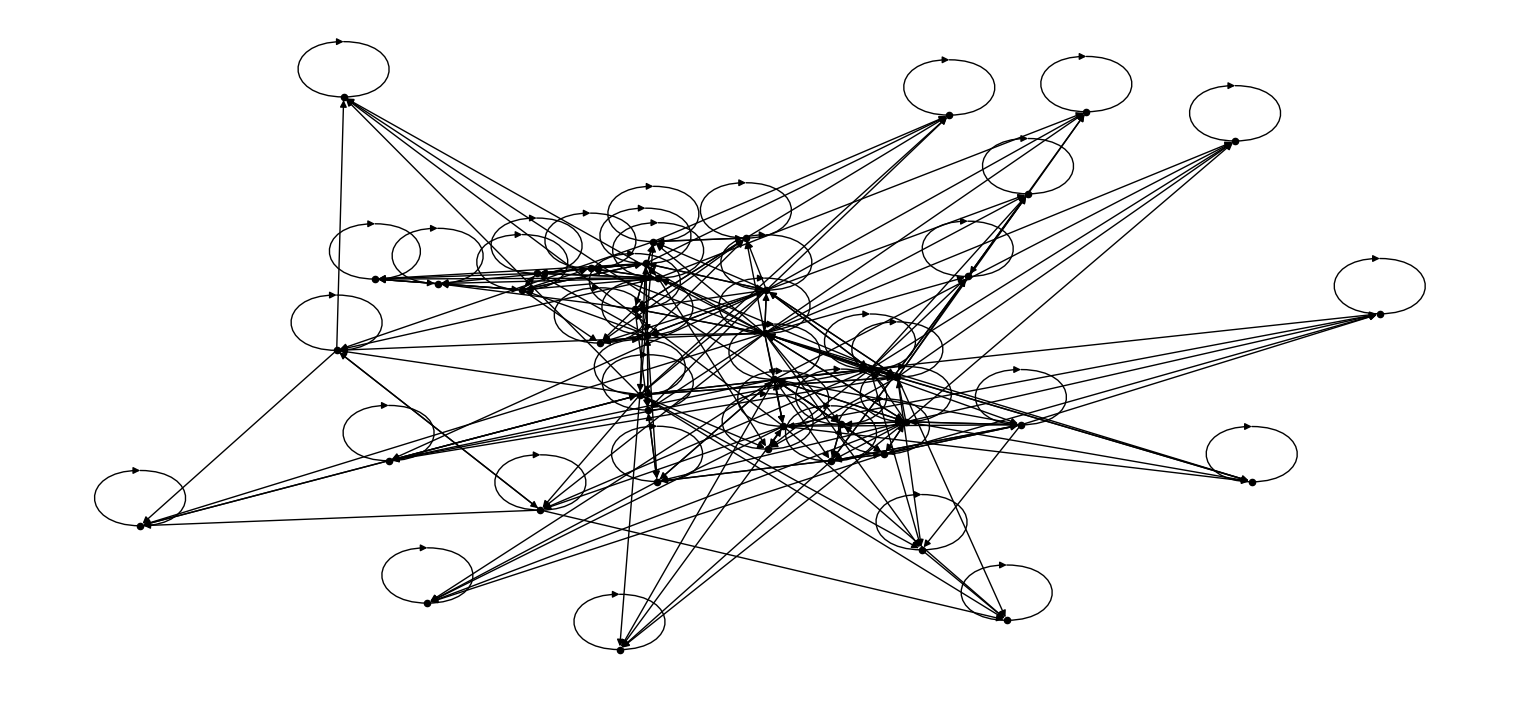

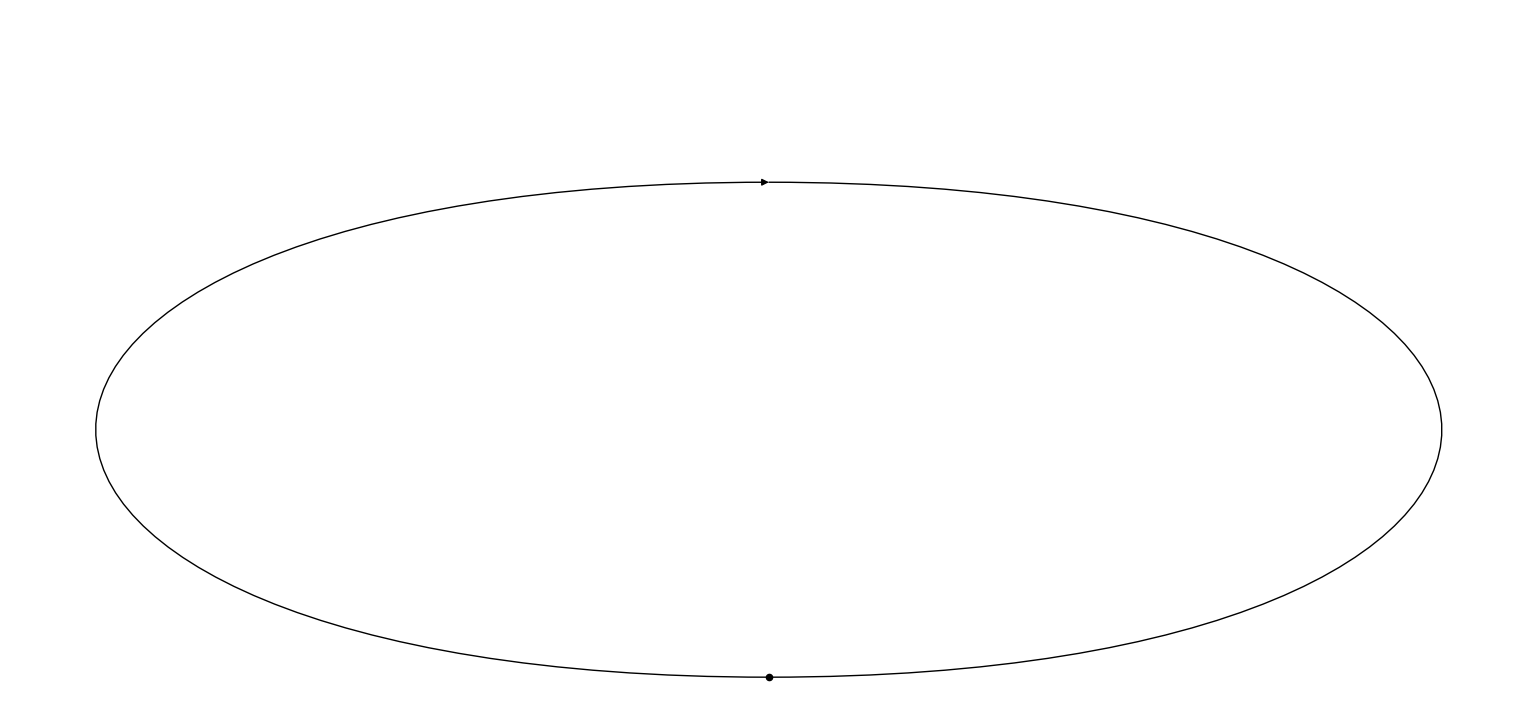

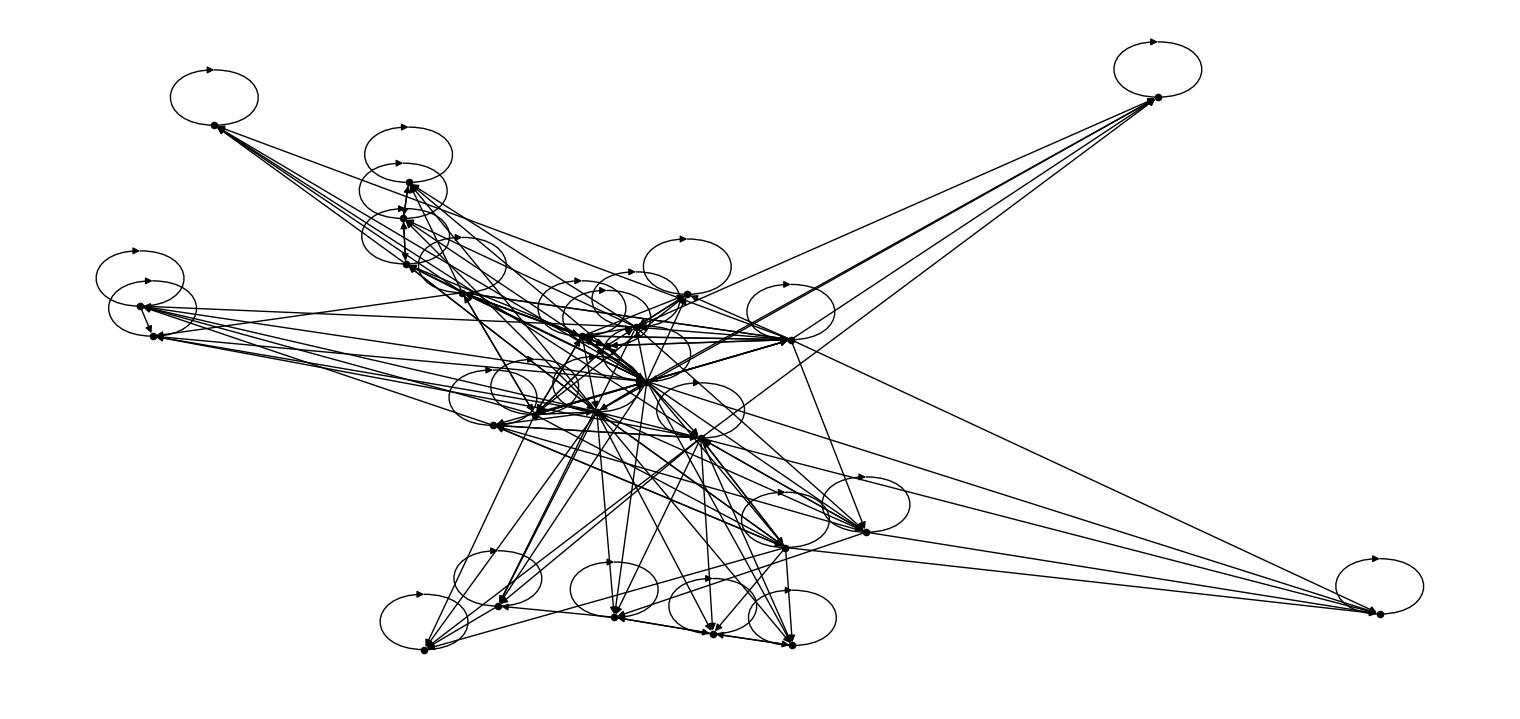

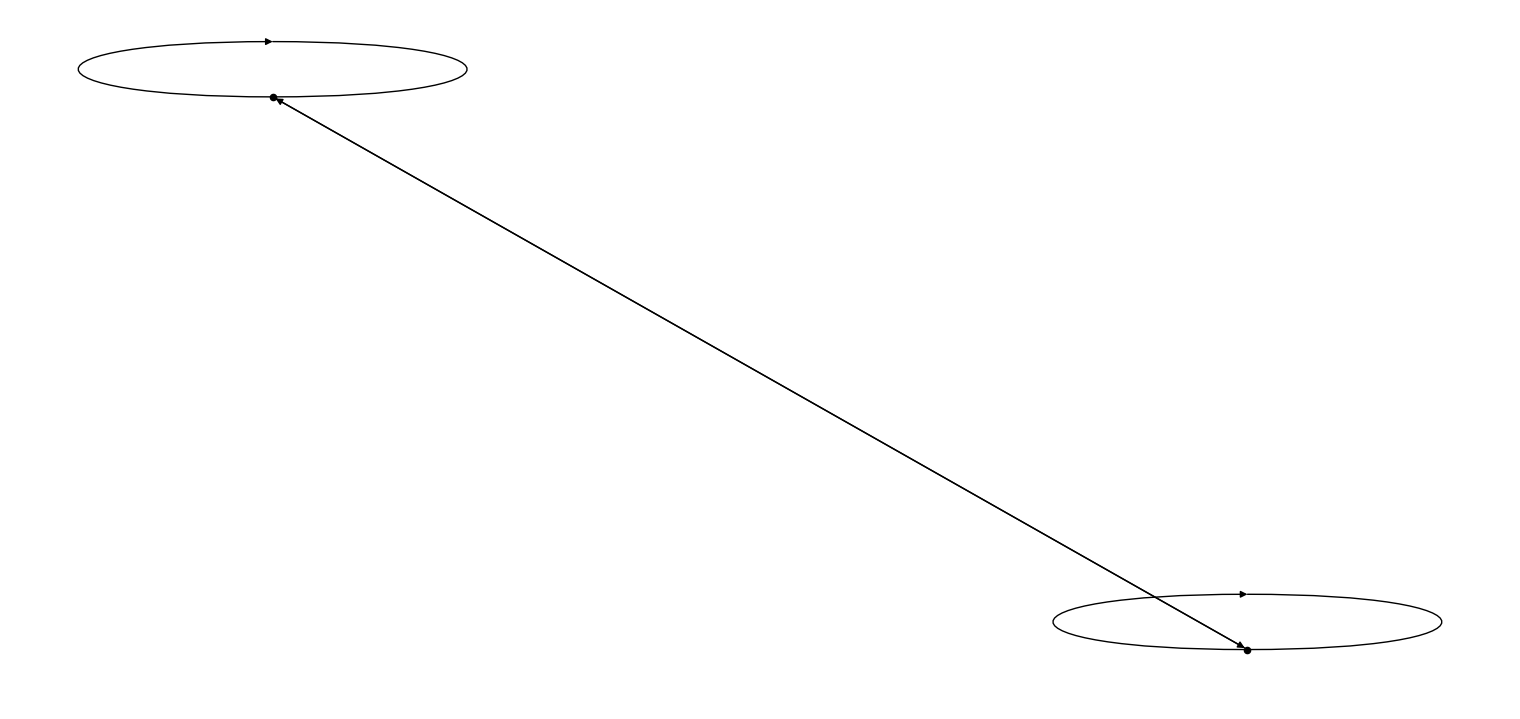

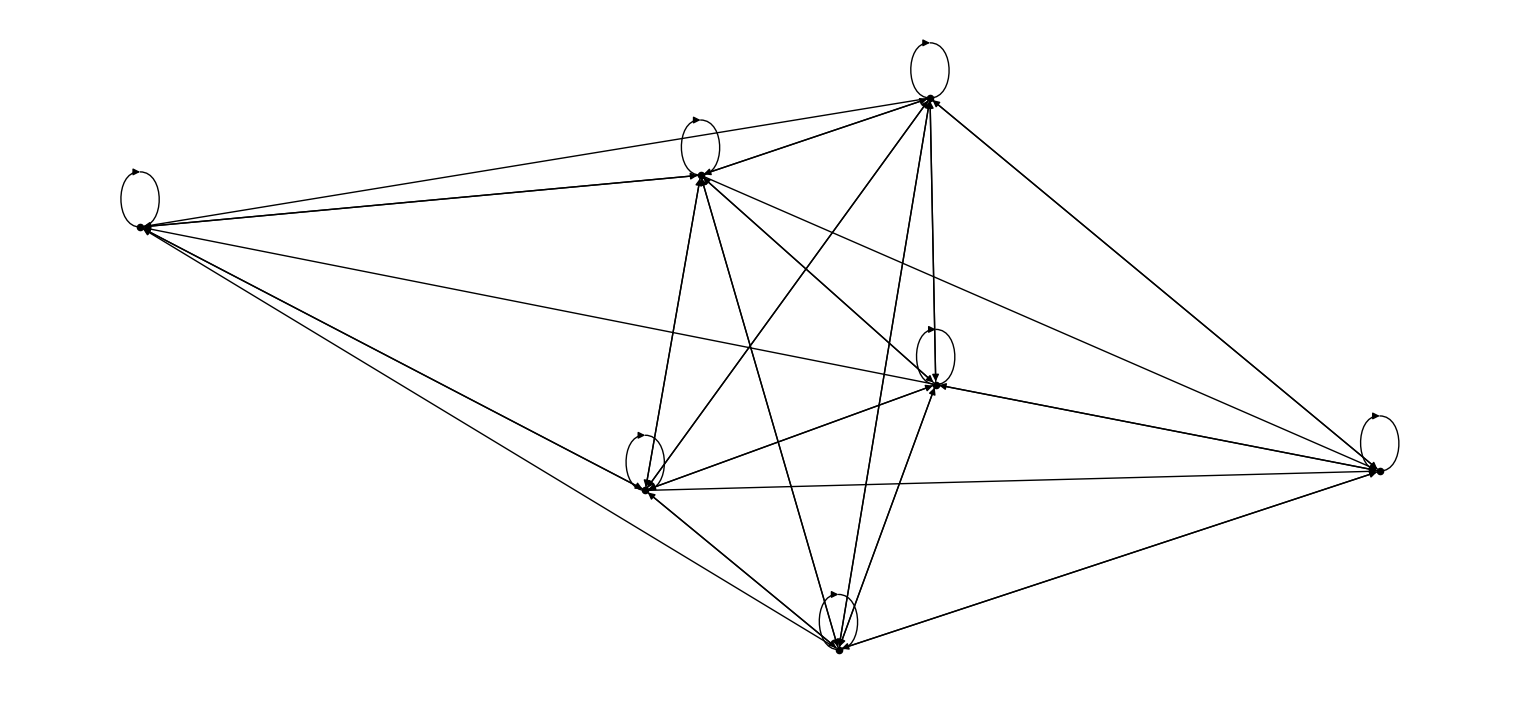

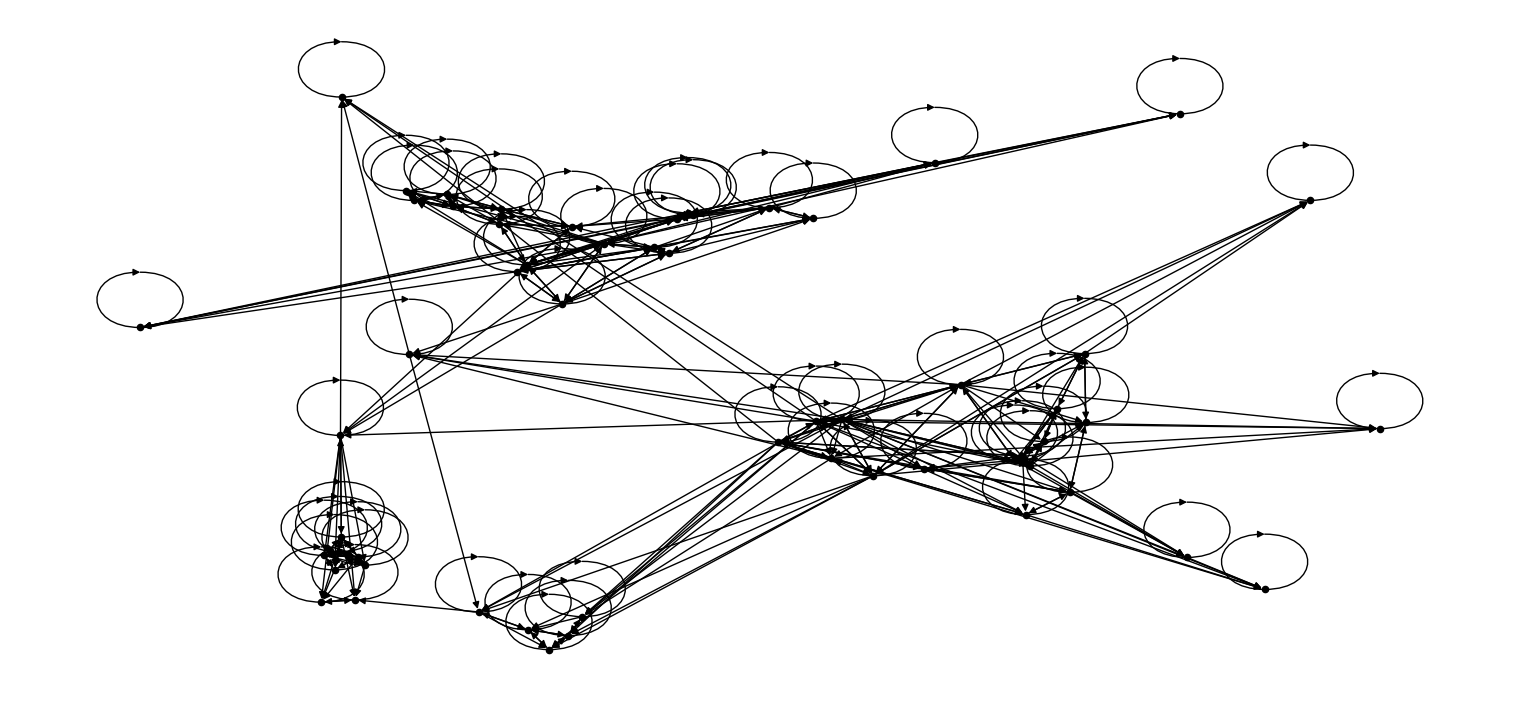

In [ ]:
i=0
for b in test_dataloader:
    if i>5: break
    i+=1
    G = dgl.to_networkx(b)
    plt.figure(figsize=[15,7])
    nx.draw(G, **options)

#Fully trainable LLM-Graph Custom Model


In [ ]:
train['text', 'created_at', 'label']

KeyError: ignored

In [ ]:
columns = ['p_text', 'created_at', 'label_en']
columns_tranformed = ['text', 'time', 'target']

In [ ]:
nlp_train_df = train[columns]
nlp_test_df = test[columns]
nlp_val_df = val[columns]
nlp_train_df.columns=columns_tranformed
nlp_test_df.columns=columns_tranformed
nlp_val_df.columns=columns_tranformed

In [ ]:
nlp_train_df.reset_index()

,created_at,text,time,target
0,2014-04-02 02:41:25+00:00,RT @user BREAKING: #Tsunami warning continues ...,2014-04-02 02:41:25+00:00,6
1,2014-04-02 02:41:26+00:00,RT @user UPDATE: NO #Tsunami threat for #BC fo...,2014-04-02 02:41:26+00:00,6
2,2014-04-02 02:41:26+00:00,RT @user UPDATE: NO #Tsunami threat for #BC fo...,2014-04-02 02:41:26+00:00,3
3,2014-04-02 02:41:27+00:00,RT @user BREAKING: #Tsunami warning continues ...,2014-04-02 02:41:27+00:00,0
4,2014-04-02 02:41:32+00:00,RT @user UPDATE: NO #Tsunami threat for #BC fo...,2014-04-02 02:41:32+00:00,6
...,...,...,...,...
14092,2015-12-30 10:31:12+00:00,#StormFrank: Weather bomb hits NI leaving trai...,2015-12-30 10:31:12+00:00,3
14093,2015-12-30 10:31:58+00:00,Second time @user . Salon closed until further...,2015-12-30 10:31:58+00:00,3
14094,2015-12-30 10:33:50+00:00,Good morn from Bandon medical clinic @user @us...,2015-12-30 10:33:50+00:00,3
14095,2015-12-30 10:34:30+00:00,10am in Bandon :( floods again ... Everyone se...,2015-12-30 10:34:30+00:00,3


In [ ]:
nlp_train_df.columns = train['text', 'created_at', 'label']
nlp_val_df.columns = val['text', 'created_at',  'label']
nlp_test_df.columns = test['text', 'created_at',  'label']

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

In [ ]:
class NLPDataset(Dataset):
    def __init__(self, data, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.tweets = data.text
        self.targets = data.label
        self.max_len = max_len

    def __len__(self):
        return len(self.tweets)


    def __getitem__(self, index):
        text = str(self.tweets.iloc[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]

        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'time' : torch.tensor(self.targets.iloc[index], dtype=torch.float),
            'targets': torch.tensor(self.targets.iloc[index], dtype=torch.float)
        }

In [ ]:
class CrisisNLP2DGL(nn.Module):
    def __init__(self, embedings_model, in_feat, hidden_dim, heads_n, classes_n, device):
        super(CrisisNLP2DGL, self).__init__()
        self.embedings_model = embedings_model
        self.l1 = RobertaModel.from_pretrained("roberta-base")
        self.gatc1 = dglnn.GATConv(in_feat, hidden_dim, 1).to(device)
        self.linear1 = nn.Linear(hidden_dim, classes_n).to(device)



    def forward(self, x):
        self.embedings_model
        knn_g = dgl.knn_graph(x, self.neigh_n, dist='cosine')
        h =self.gatc1(g, h)
        h = torch.relu(h)
        #h = self.dropout1(h)
        #h = h.reshape(bs, -1)
        #h =self.gatc2(g, h)
        #h = torch.relu(h)
        h = self.linear1(h)
        h = torch.relu(h)
        return h

    def reset_weights(self):
        for layer in self.children():
            if hasattr(layer, 'reset_parameters'):
                layer.reset_parameters()